<a href="https://colab.research.google.com/github/nancywahl/CrimeAnalysis/blob/master/PYF_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
!pip install numpy==1.25.2 pandas==2.0.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/MyDrive/Project1FHub/foodhub_order.csv')
#data1 = pd.read_csv('/content/drive/My Drive/MyDrive/Project1FHub/foodhub_order.csv')



In [ ]:
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
data.shape
#There are 1898 rows and 9 columns.

(1898, 9)

In [ ]:
#Checking for duplicate entries
data.duplicated().sum()

0

#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
data.info()
#There are 4 variables of integer type (int64), 1 of float (float64), and 4 variables of type object or categorical in the original dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
data.isnull().sum()
#It appears that there are no missing values, but some of the object data may contain some.

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
data['restaurant_name'].value_counts(dropna=False)
#No missing values here with dropna=False

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

In [ ]:
data['cuisine_type'].value_counts(dropna=False)
#No missing values here either.

cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: count, dtype: int64

In [ ]:
data['day_of_the_week'].value_counts(dropna=False)
#No missing values here.

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

In [ ]:
data['rating'].value_counts(dropna=False)

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

In [ ]:
#It appears that only 'rating' is missing values. For now I will replace 'Not given' with np.nan. Then I will convert the data
# to integer. I may replace the np.nan with the mean or median values following appropriate analysis.


In [ ]:
data['rating'] = data['rating'].replace(['Not given'], np.nan)

In [ ]:
data['rating'].value_counts(dropna=False)
#There are 736 ratings that were not given.


rating
NaN    736
5      588
4      386
3      188
Name: count, dtype: int64

In [ ]:
data['rating'] = data['rating'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 133.6+ KB


In [ ]:
new_data = data.copy()
new_data = new_data[new_data['rating'].notnull()]
new_data.info()
#I am now removing the 736 rows from a dataframe based on 'data' that are missing values in 'rating'.

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 90.8+ KB


In [ ]:
new_data['rating'] = new_data['rating'].astype(int)
#In order to convert 'rating' to type integer, I had to filter out the NaNs first.
#I will use this new_data DF just for analyzing 'rating'


In [ ]:
#In order to go on to modeling, we would need to impute missing values to 'rating'. This is one way to do it.
data_rate = data.copy()
data_rate['rating'] = data_rate['rating'].fillna(value = data_rate.groupby(['cuisine_type'])['rating'].transform('median'))
data_rate['rating'] = data_rate['rating'].astype(int)
data_rate['rating'].value_counts(dropna=False)


rating
5    1061
4     649
3     188
Name: count, dtype: int64

#### Observations: Now there are 5 integer variables, 1 float one and 3 object ones in the abbreviated dataset. In the original dataset with the null values it will only convert to float.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
data_rate.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.459958,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.668383,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


The minimum, maximum and mean time for food preparation is 20, 35 and 27.4 minutes respectively.


#### Observations:


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
#There are 736 orders not rated.
data['rating'].value_counts(dropna = False)

rating
NaN    736
5.0    588
4.0    386
3.0    188
Name: count, dtype: int64

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

Number of unique customer IDs 1200


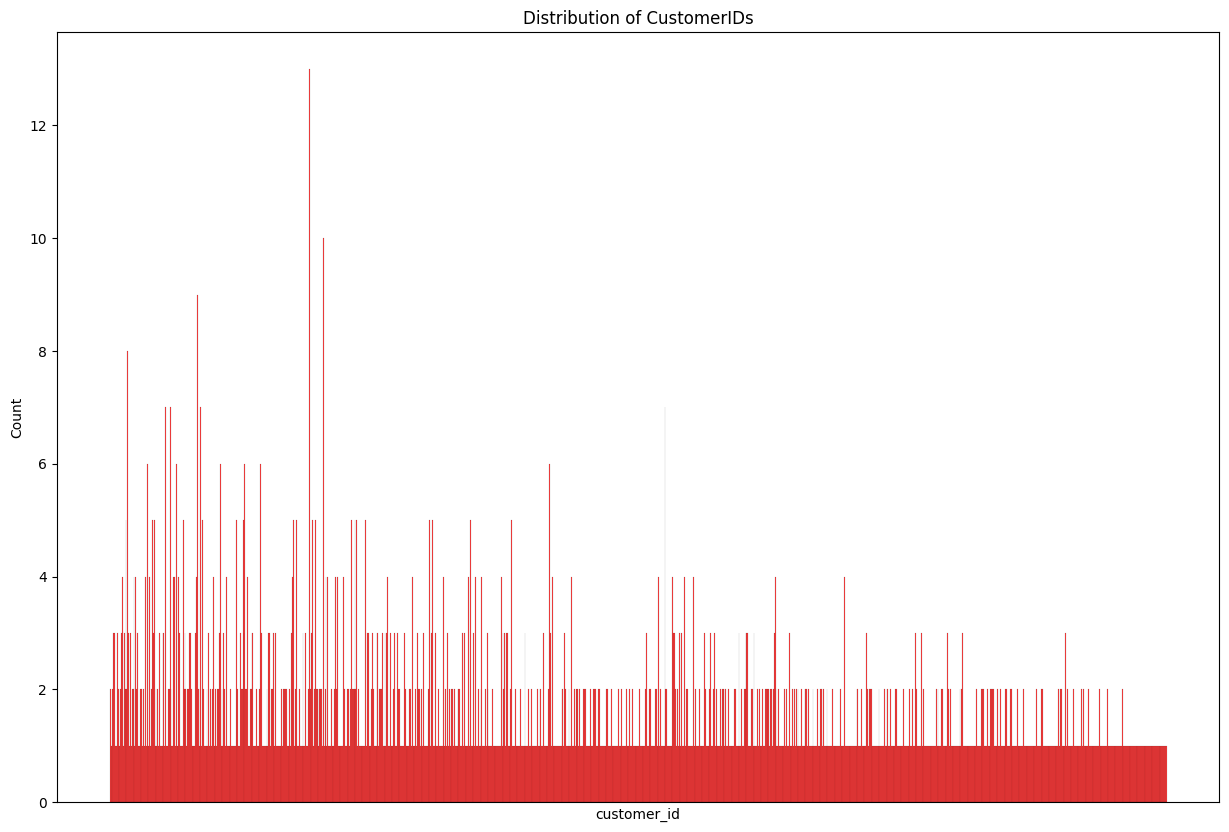

In [ ]:
# Write the code here
#I chose histplot instead of countplot because they both show the same graphs except countplot had a 90 rotation!
cusnum = data['customer_id'].nunique()
print('Number of unique customer IDs',cusnum)
Cust_id = data_rate['customer_id']
Cust_id = Cust_id.astype(str)
plt.figure(figsize =( 15,10))
sns.histplot(Cust_id, color = 'red')
plt.xticks([])
plt.title('Distribution of CustomerIDs')

plt.show()



After seeing that some customers are repeat customers since there were only 1200 unique customer ids but almost 1900 orders, I converted the data to string so I could use histplot. Most of the customers only used the service once, but 1 customer used it 13 times. Many used it twice. To get a better picture I will use value_counts.

In [ ]:
data_rate['customer_id'].value_counts(ascending = False).head(20)

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
107909     6
275689     6
60052      6
115213     6
301032     5
241719     5
97806      5
142461     5
94152      5
232035     5
Name: count, dtype: int64

<Figure size 2000x1500 with 0 Axes>

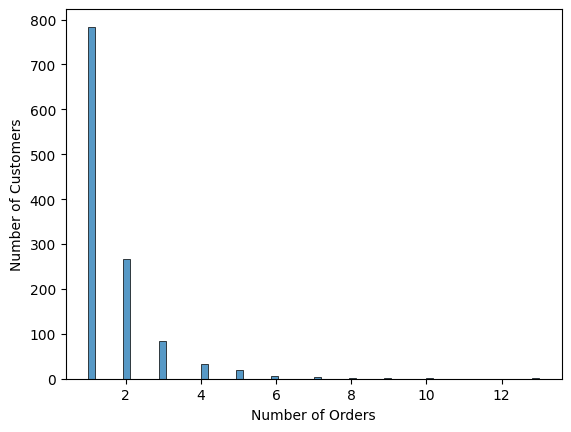

<Figure size 2000x1500 with 0 Axes>

In [ ]:
cust_freq = data_rate['customer_id'].value_counts(ascending = False)
sns.histplot(cust_freq)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.figure(figsize =( 20,15))

In [ ]:
print((cust_freq==1).sum(),'single order customers',(cust_freq==2).sum(), '2-order customers',(cust_freq==3).sum(),'3-order customers')
print((cust_freq==4).sum(),'4-order customers',     (cust_freq==5).sum(), '5-order customers',(cust_freq==6).sum(),'6-order customers')

784 single order customers 267 2-order customers 83 3-order customers
33 4-order customers 19 5-order customers 6 6-order customers


Of the remaining 4 customers, one ordered 7 times, another ordered 8 times, one 9 times, another 10 times and one 13 times. That adds up to 1200 customers!

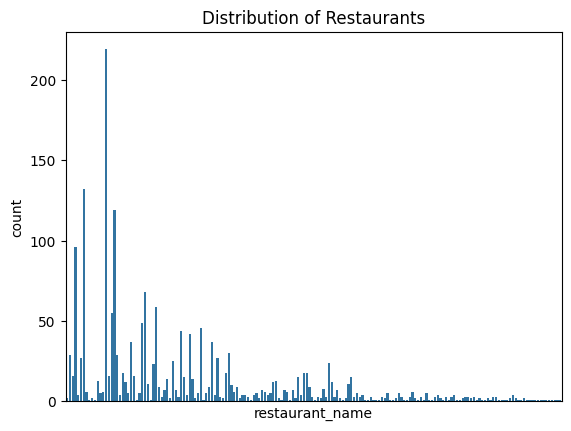

In [ ]:
sns.countplot(data=data_rate, x = 'restaurant_name')
plt.title('Distribution of Restaurants')
plt.xticks([])
plt.show();

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

#The top 5 restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

In [ ]:
data_rate['restaurant_name'].value_counts().sort_values(ascending=False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
data_rate[data_rate['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().sort_values(ascending = False)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

The most popular cuisine on the weekends is American.

In [ ]:
data_rate.groupby('day_of_the_week')[['cuisine_type']].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Mexican            24
                 Indian             24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Middle Eastern     32
                 Mediterranean      32
                 Thai               15
                 French             13
                 Korean         

In [ ]:
#This shows the distribution of favored cuisines during the week and on the weekend for the REDUCED dataset based on 'rating'
new_data.groupby('day_of_the_week')[['cuisine_type']].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          111
                 Japanese           74
                 Italian            62
                 Chinese            26
                 Mexican            16
                 Middle Eastern     15
                 Indian             14
                 Mediterranean      11
                 Southern            4
                 French              2
                 Vietnamese          2
                 Korean              2
                 Thai                1
Weekend          American          257
                 Japanese          199
                 Italian           110
                 Chinese           107
                 Indian             36
                 Mexican            32
                 Mediterranean      21
                 Middle Eastern     19
                 Southern            9
                 Thai                8
                 French              8
                 Korean         

##The most popular cuisine on the weekends is American at 415 orders, followed by Japanese, Italian and Chinese food. The same order of preference was observed for weekday orders, but fewer in number.

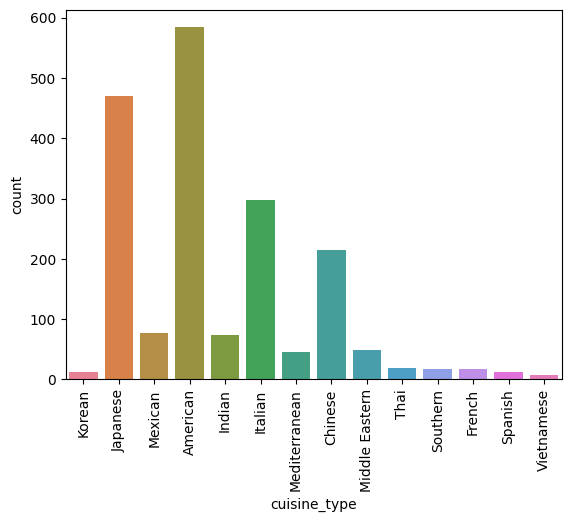

In [ ]:
#I would like to display total counts of each type
#plt.figure(figsize=(15,10))
sns.countplot(data=data_rate,x='cuisine_type',hue='cuisine_type')
plt.xticks(rotation=90)
plt.show()


In [34]:
orig_list = data_rate['cuisine_type'].value_counts(ascending = False)
new_list = new_data['cuisine_type'].value_counts(ascending = False)
new_orig = new_list/orig_list
new_orig
#This explores any effect on cuisine_type percentages after removing the records with missing data for 'rating'.
#I didn't see any major differences among the most commonly favored cuisine.

cuisine_type
American          0.630137
Chinese           0.618605
French            0.555556
Indian            0.684932
Italian           0.577181
Japanese          0.580851
Korean            0.692308
Mediterranean     0.695652
Mexican           0.623377
Middle Eastern    0.693878
Southern          0.764706
Spanish           0.500000
Thai              0.473684
Vietnamese        0.714286
Name: count, dtype: float64

In [35]:
new_data['restaurant_name'].value_counts().sort_values(ascending=False).head(10)
#Neither did the order of favored restaurants change very much.

restaurant_name
Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
RedFarm Broadway              41
Parm                          39
RedFarm Hudson                34
TAO                           28
Rubirosa                      24
Han Dynasty                   23
Name: count, dtype: int64

In [36]:
data_rate['restaurant_name'].value_counts().sort_values(ascending=False).head(10)

restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: count, dtype: int64

I found that not only the overall number of records was reduced to 61% of the total records, but they were uniformly reduced across restaurants as well. In addition, the distribution of cuisine types in the reduced population were similar to that of the original. Stats of numerical data changed little. This supports applying the mean or median ratings for each cuisine type for missing data. These can be used in modeling to supply the missing data according to an important variable - cuisine type.

In [37]:
new_data.groupby('cuisine_type')[['rating']].median()

,rating
cuisine_type,
American,4.0
Chinese,5.0
French,4.5
Indian,5.0
Italian,5.0
Japanese,5.0
Korean,4.0
Mediterranean,4.5
Mexican,5.0


In [38]:
new_data[new_data['rating'] == 3]['cuisine_type'].value_counts()


cuisine_type
American          64
Japanese          40
Italian           28
Chinese           24
Mediterranean      9
Mexican            6
Indian             5
Middle Eastern     5
French             2
Korean             2
Vietnamese         2
Southern           1
Name: count, dtype: int64

In [39]:
new_data[new_data['rating'] >= 4]['cuisine_type'].value_counts()
#We see that across cuisine_types, there is a similar ratio of ratings of 3 to 4 or 5.

cuisine_type
American          304
Japanese          233
Italian           144
Chinese           109
Indian             45
Mexican            42
Middle Eastern     29
Mediterranean      23
Southern           12
Thai                9
French              8
Korean              7
Spanish             6
Vietnamese          3
Name: count, dtype: int64

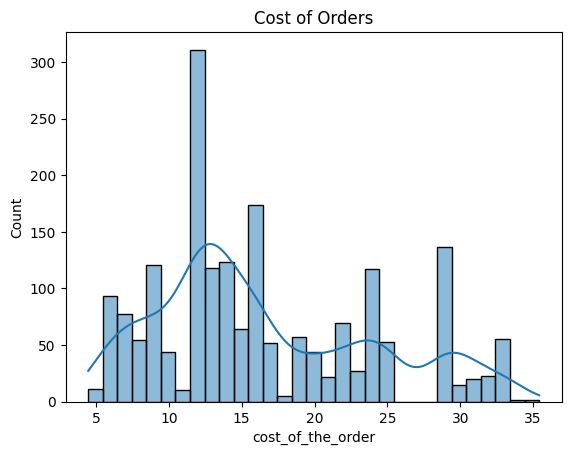

In [40]:
sns.histplot(data=data_rate,x='cost_of_the_order',bins = 31,kde=True)
plt.title('Cost of Orders')
plt.show()
#We see 3 modes here in cost_of_the_order, the highest at around $12.00.

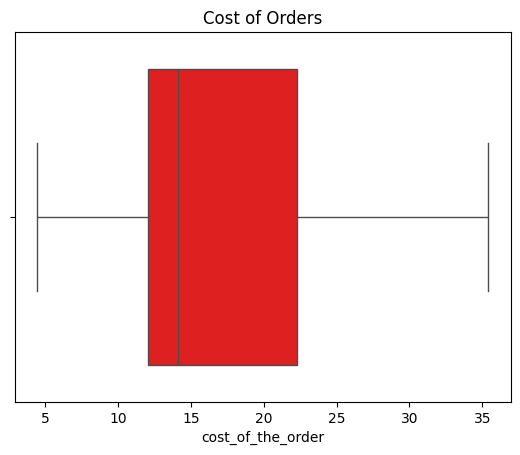

In [41]:
sns.boxplot(data=data_rate,x='cost_of_the_order',color='red')
plt.title('Cost of Orders')
plt.show()
#interesting there are no outliers in the cost. The IQR ranges from about $11-22.The minimum less than $5, the max $35.

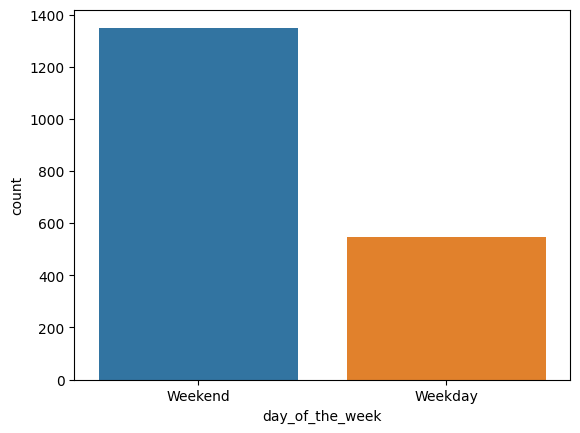

In [42]:
sns.countplot(data=data_rate,x='day_of_the_week',hue = 'day_of_the_week')
plt.show()
#We see that there were more than 2x the number of orders on the weekend as during the week

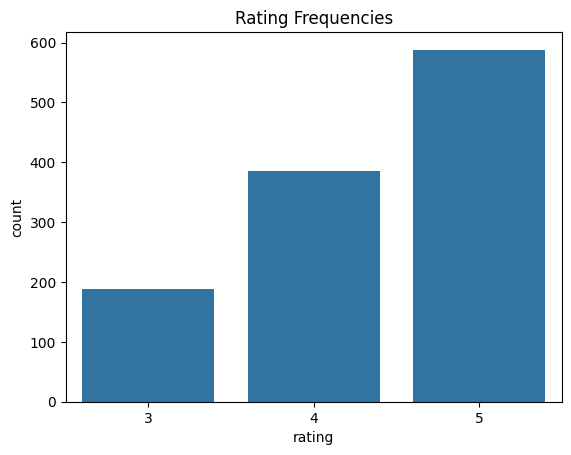

In [43]:
sns.countplot(data=new_data,x='rating')
plt.title('Rating Frequencies')
plt.show()
#We see that 2x as many rated the meal a 4.0 than a 3.0, and 3x as many rated their meal a 5.0 compared to 3.0. No ratings below 3!

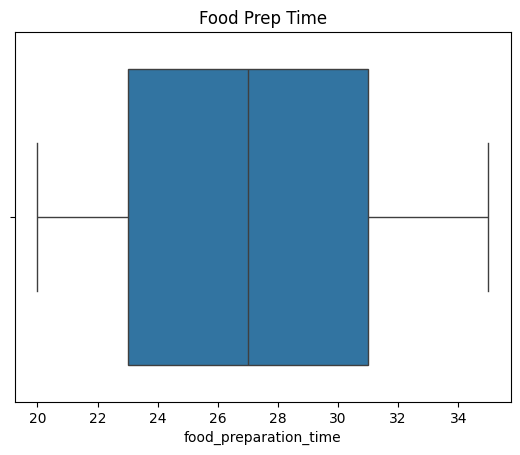

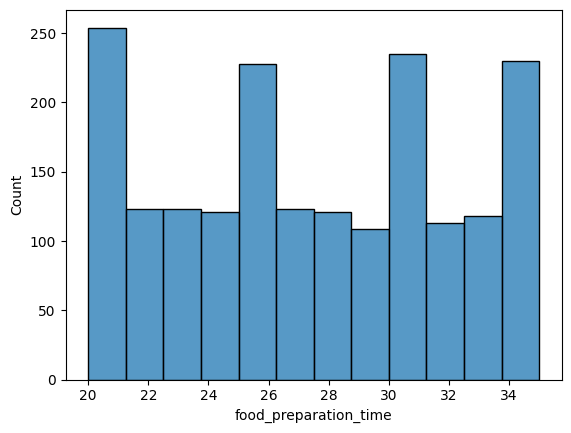

In [44]:
sns.boxplot(data=data_rate,x = 'food_preparation_time')
plt.title('Food Prep Time')
plt.show()
sns.histplot(data=data,x='food_preparation_time')
plt.show()
#We see very symmetrical distribution for Food Prep time. The median is close to the mean, the whiskers similar in length.
#It also appears there must be certain popular times that take 1 of 4 different times: 20, 26,31 or 34 minutes.
#Otherwise there is a fairly even number of orders that take 22-24, 27-30,or 32-33 minutes.

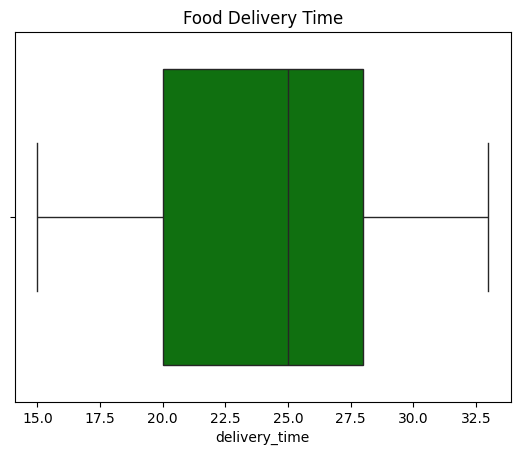

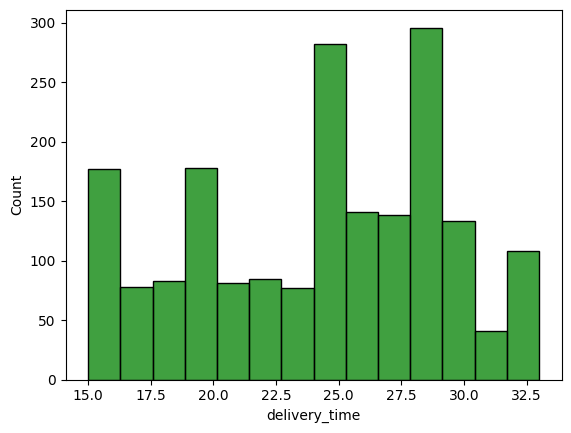

In [45]:
sns.boxplot(data=data_rate,x = 'delivery_time',color='green')
plt.title('Food Delivery Time')
plt.show()
sns.histplot(data=data,x='delivery_time',color='green')
plt.show()
#A similar odd distribution was observed for delivery times. Common delivery times were 15,19,25 and 28 minutes. Others were less.

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [46]:
data_rate.loc[data_rate['cost_of_the_order']>20.0].shape[0]
Percent_over20 = 100* (data_rate[data_rate['cost_of_the_order']>20.0].shape[0])/data_rate.shape[0]
print('Percent of orders over $20. = ', format(Percent_over20,'.2f'))

Percent of orders over $20. =  29.24


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [47]:
print('The mean order delivery time in minutes is ',format( data_rate['delivery_time'].mean(),'.2f'))

The mean order delivery time in minutes is  24.16


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [48]:
best_cust = data_rate['customer_id'].value_counts().sort_values(ascending = False)

In [49]:
print('These 3 customers were the most frequent listed by', best_cust[0:3])

These 3 customers were the most frequent listed by customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


#### Observations: Customer #52832 ordered 13x, #47440 ordered 10x and #83287 ordered 9x.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


# My multivariate analysis will begin with a heatmap that shows correlations among all numeric variables


In [51]:
#First I would like to create another column in our dataframe called 'total_time' which is sum of prep and delivery times.
data_rate['total_time'] = data_rate['food_preparation_time'] + data_rate['delivery_time']
data_rate.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,5,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


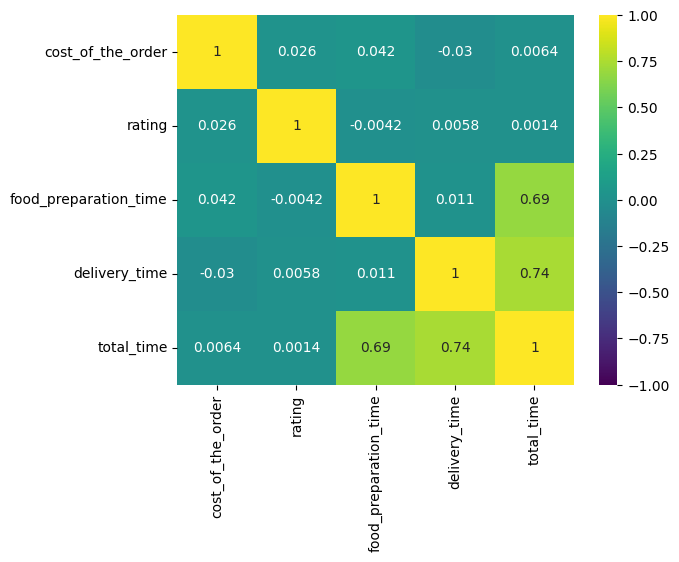

In [52]:
sns.heatmap(data_rate[['cost_of_the_order','rating','food_preparation_time','delivery_time','total_time']].corr(),annot=True,cmap='viridis',vmin=-1,vmax=1)
plt.show()

##As can be observed, the only significant correlations among these numeric variables are food prep and delivery with respect to the total time. There is a very slight negative correlation between rating and the time for food prep and delivery. I will explore other relationships that include categorical variables.

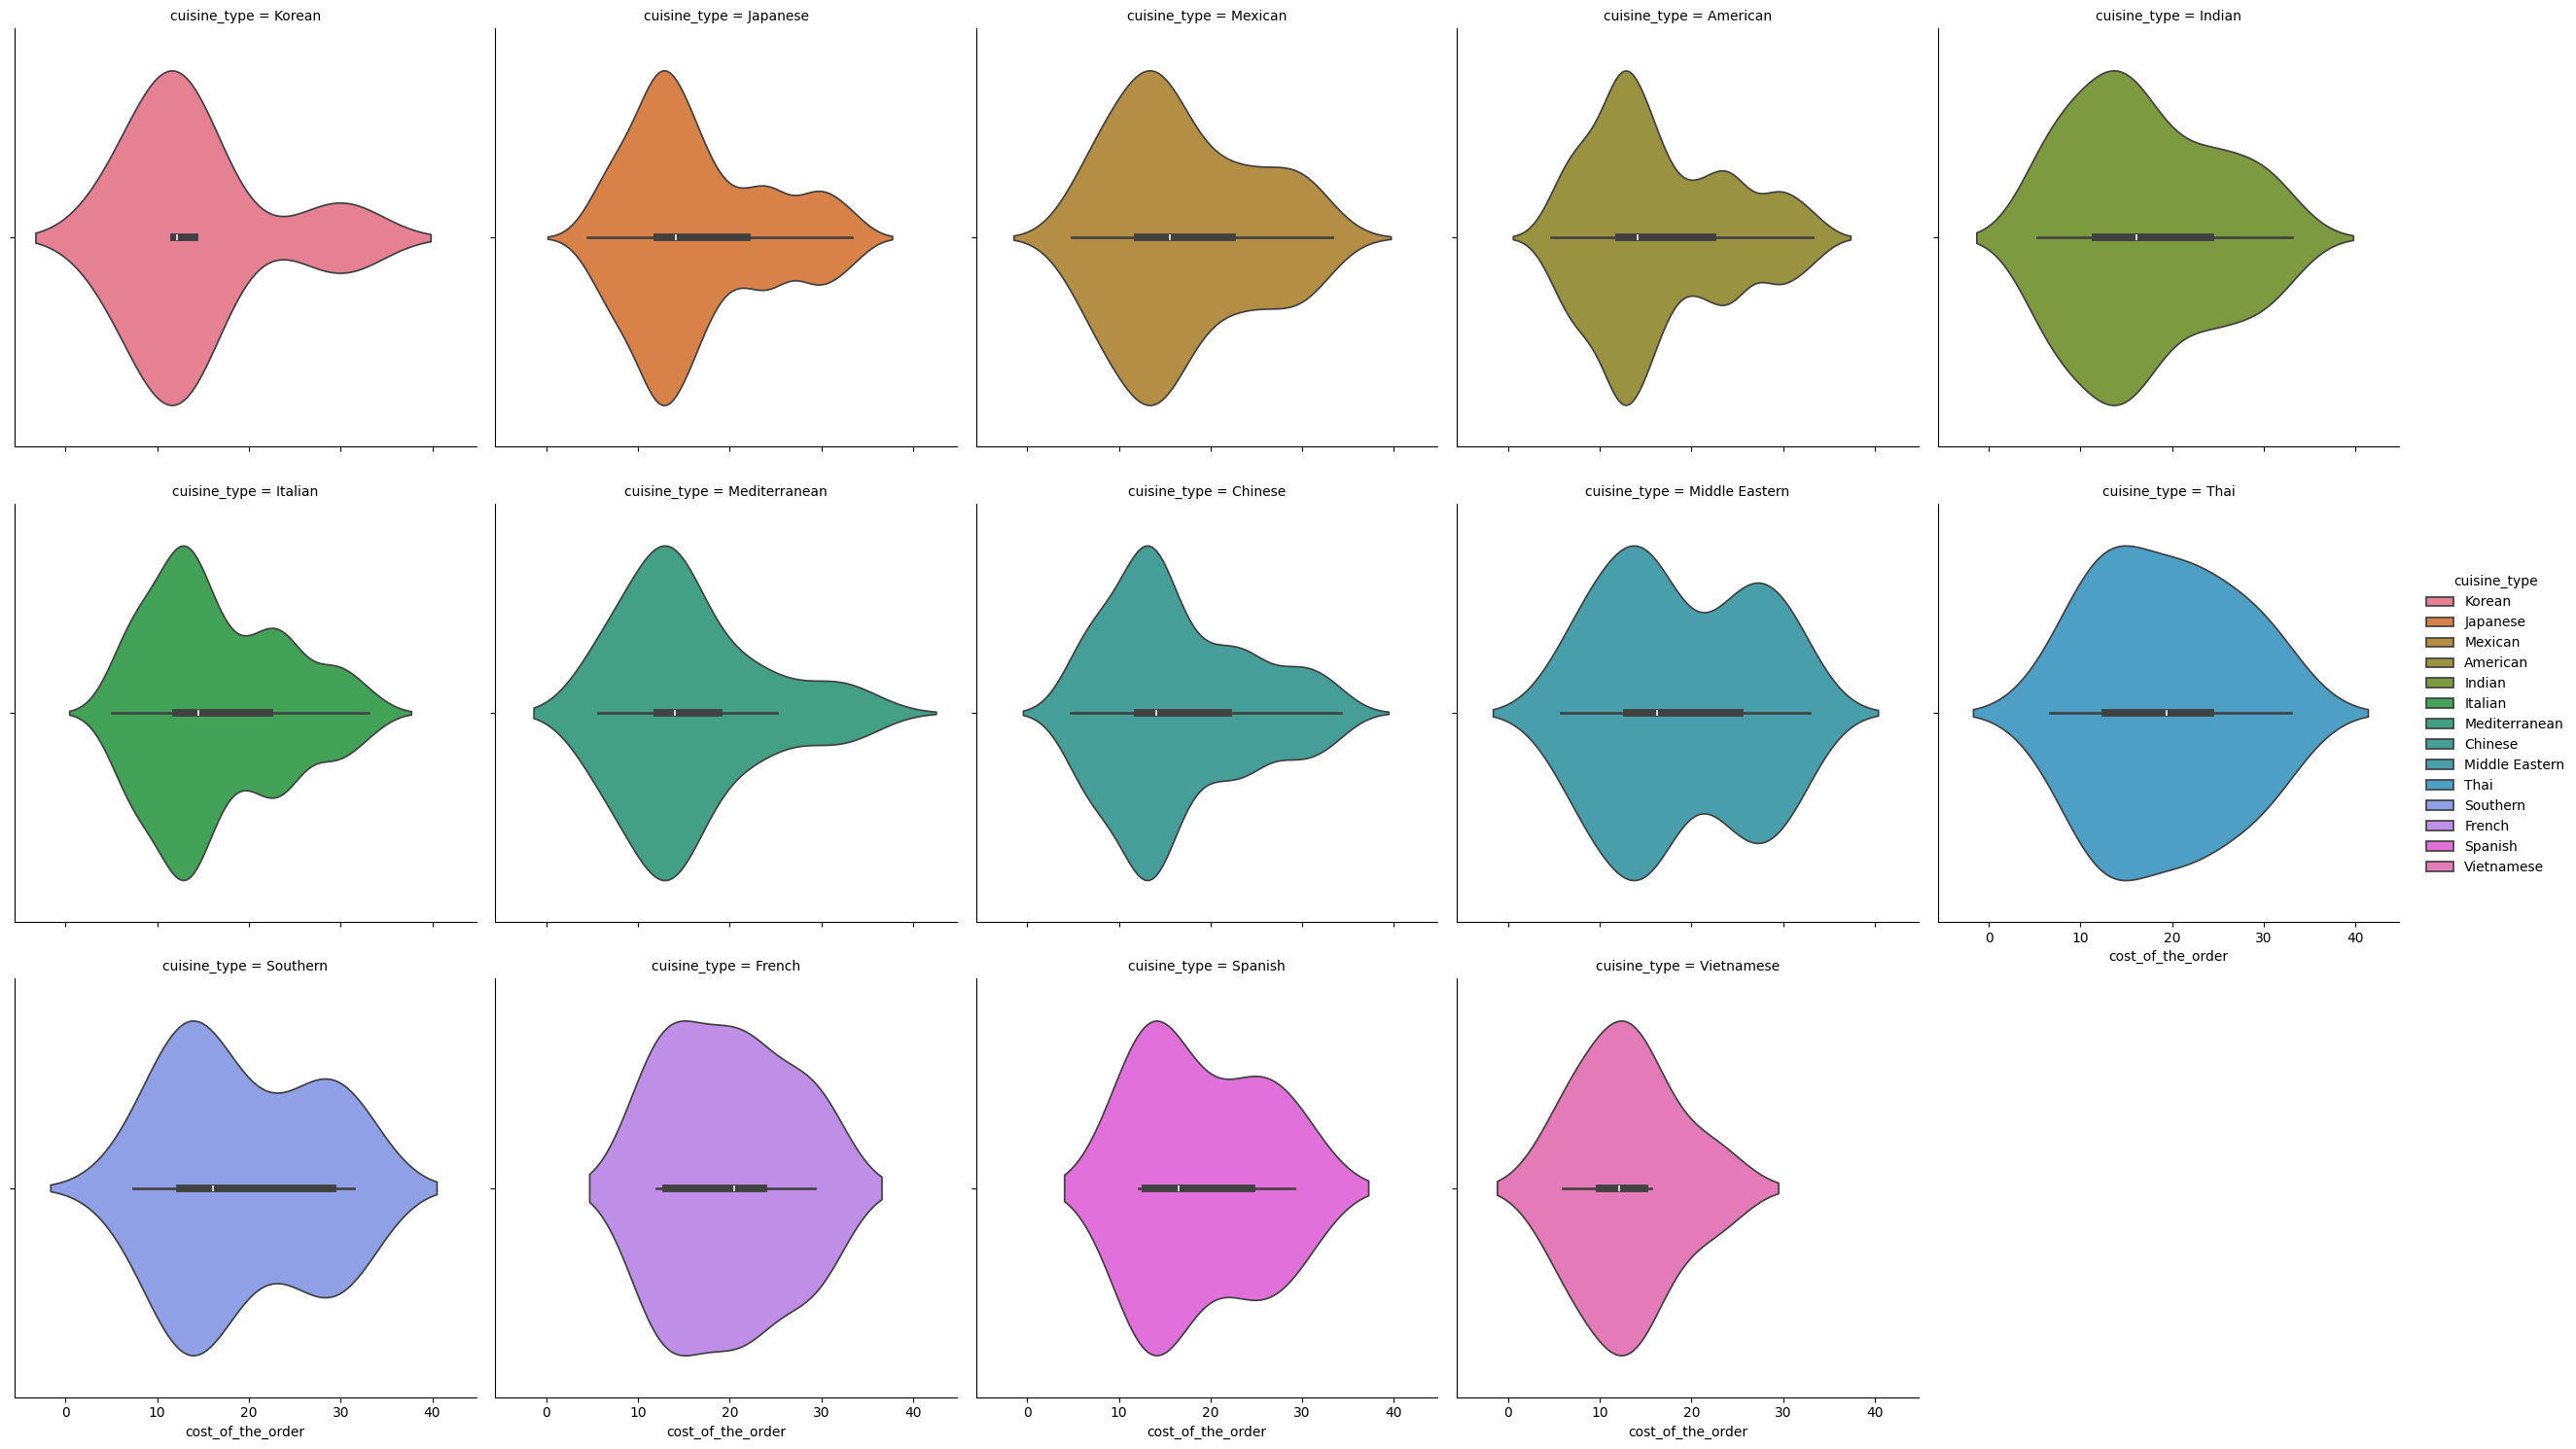

In [53]:
sns.catplot(data=data_rate,x='cost_of_the_order',col = 'cuisine_type',kind = 'violin',col_wrap=5,hue = 'cuisine_type')

In [54]:
cuis_cost = data_rate.groupby('cuisine_type')[['cost_of_the_order']].median()
cuis_cost.sort_values('cost_of_the_order',ascending = True)

,cost_of_the_order
cuisine_type,
Vietnamese,12.130
Korean,12.180
Mediterranean,13.995
Japanese,14.070
American,14.120
Chinese,14.120
Italian,14.480
Mexican,15.570
Southern,16.110


##This is a great way to look at how cost of the order varies according to the type of cuisine. Many are bimodal such as Korean, Mexican, Indian, Mediterranean (slightly), Middle Eastern, Southern and Spanish. Others like Japanese, American, Italian and Chinese are actually trimodal. The rest may be characterized by a single mode close to the median for cuisines including French, Thai and Vietnamese. Thai food and French food are relatively expensive which may explain to some extent why they are less popular but it's obvious cost isn't the only factor, especially when you look at the list of median prices. Means are generally higher as the plots are right-skewed.The most frequently ordered meals have middling costs.



In [55]:
cuisine_rt = data_rate.groupby('cuisine_type')[['rating']].median()
cuisine_rt.sort_values('rating', ascending = True)

,rating
cuisine_type,
American,4.0
French,4.0
Korean,4.0
Mediterranean,4.0
Middle Eastern,4.0
Southern,4.0
Vietnamese,4.0
Chinese,5.0
Indian,5.0


##It is interesting to see that the most popular cuisine by far (American) has a lower median rating than the Japanese, Italian and Chinese dishes.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [56]:
#I obtained this shortened name list from a prior list of favorite restaurants above. I reasoned there had to be at least 50 orders for the venue.
Name_list = ['Shake Shack','The Meatball Shop','Blue Ribbon Sushi','Blue Ribbon Fried Chicken','Parm','RedFarm Broadway','RedFarm Hudson']
for x in Name_list:
  ratecount = new_data[new_data['restaurant_name']==x]['rating'].value_counts().sum()
  meanrate = new_data[new_data['restaurant_name']==x]['rating'].mean()
  if ratecount > 50:
    if meanrate> 4.0:
      print(x, 'has a rate count of:', ratecount)
      print(x, 'has a mean rating of:', meanrate)
  else:
    continue

Shake Shack has a rate count of: 133
Shake Shack has a mean rating of: 4.2781954887218046
The Meatball Shop has a rate count of: 84
The Meatball Shop has a mean rating of: 4.511904761904762
Blue Ribbon Sushi has a rate count of: 73
Blue Ribbon Sushi has a mean rating of: 4.219178082191781
Blue Ribbon Fried Chicken has a rate count of: 64
Blue Ribbon Fried Chicken has a mean rating of: 4.328125


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [57]:
data_rate.loc[data_rate['cost_of_the_order']<=20].value_counts().sum()

1343

In [58]:
data_rate.loc[data_rate['cost_of_the_order']>20].value_counts().sum()

555

In [59]:
data_rate['cost_of_the_order'].sum()

31314.82

In [60]:
Revenue = [0]*1898
for i in range(1898):
  if data_rate.loc[i]['cost_of_the_order'] > 20.0:
    Revenue[i] = data_rate.loc[i]['cost_of_the_order']*1.25
  elif data_rate.loc[i]['cost_of_the_order'] > 5.0:
    Revenue[i] = data_rate.loc[i]['cost_of_the_order']*1.15
  else:
    Revenue[i] = data_rate.loc[i]['cost_of_the_order']



In [61]:
data_rate['cost_of_the_order'].sum()
#Total cost of orders in original data

31314.82

In [62]:
data_origcost = data_rate['cost_of_the_order']
Net_revenue = Revenue - data_origcost
print('Total net revenue = $', format(Net_revenue.sum(),'.2f'),sep='')
print('Total revenue was: $',format(sum(Revenue),'.2f'),sep='')




Total net revenue = $6166.30
Total revenue was: $37481.12


#### Observations: I have discovered in this case that I can use iloc to get the same result as with loc. The net revenue for 1898 orders was $6166.30  =  $3.25 per order. I also calculated an estimated revenue outside of this code. ($12 * 1.15 * 1343)+($28 * 1.25 * 555) = $18,533 + $19425 = $37958 as a check.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [63]:
ttime = data_rate['total_time']>60
tot60plus =sum(ttime)
print('The percentage of orders taking more than a total of 60 minutes to be delivered is:', format(100* (tot60plus/data.shape[0]),'.2f'))

The percentage of orders taking more than a total of 60 minutes to be delivered is: 10.54


#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [64]:
Weekday_deliv_mean = data_rate[data_rate['day_of_the_week']=='Weekday']['delivery_time'].mean()
Weekday_deliv_std = data_rate[data_rate['day_of_the_week']=='Weekday']['delivery_time'].std()
Weekend_deliv_mean = data_rate[data_rate['day_of_the_week']=='Weekend']['delivery_time'].mean()
Weekend_deliv_std = data_rate[data_rate['day_of_the_week']=='Weekend']['delivery_time'].std()
print('The mean and std of delivery time for weekday orders respectively is:',format(Weekday_deliv_mean,'.2f' ),', ',format(Weekday_deliv_std,'.2f'))
print('The mean and std of delivery time for weekend orders respectively is:',format(Weekend_deliv_mean,'.2f' ),', ',format(Weekend_deliv_std,'.2f'))

The mean and std of delivery time for weekday orders respectively is: 28.34 ,  2.89
The mean and std of delivery time for weekend orders respectively is: 22.47 ,  4.63


<Axes: xlabel='delivery_time'>

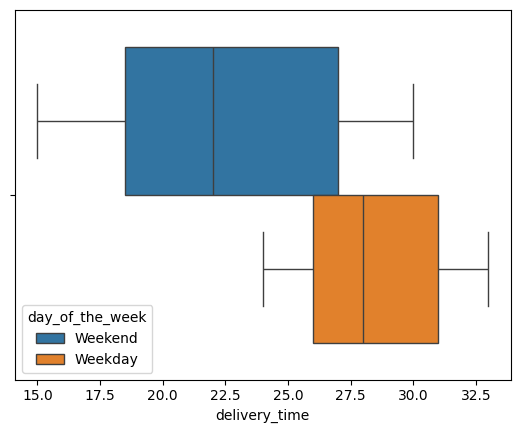

In [65]:
sns.boxplot(data=data_rate, x = 'delivery_time',hue = 'day_of_the_week')

#### We see that both distributions are right-skewed with the means somewhat higher than the medians. The mean and median of the weekday delivery times are higher than those for the weekend. Yet, the weekend delivery times vary so much that there is a little overlap between the 3rd quartile of the weekend with the first quartile of the weekday times. Probably extra traffic due to more businesses open on weekdays contributes to longer delivery times.


<Axes: xlabel='food_preparation_time'>

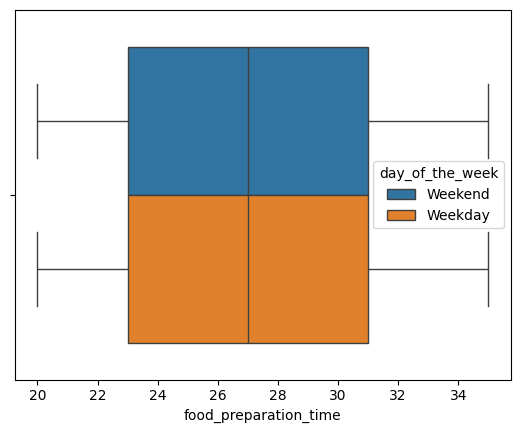

In [66]:
sns.boxplot(data=data_rate, x = 'food_preparation_time',hue = 'day_of_the_week')
#Amazingly there seems to be no difference in food preparation times between weekday and weekend.

<Axes: xlabel='total_time', ylabel='Count'>

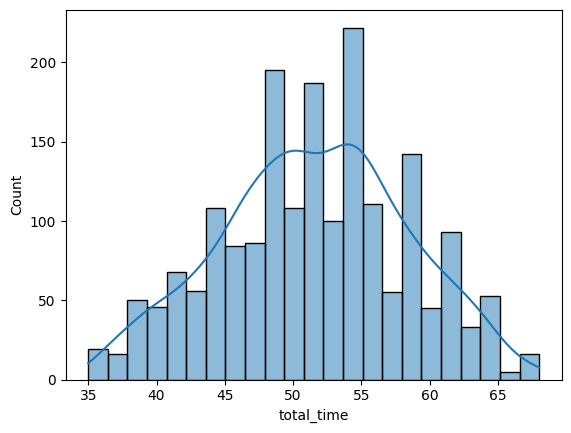

In [67]:
sns.histplot(data=data_rate, x = 'total_time',kde=True)

The plot of total_time is fairly normally distributed.

In [68]:
data_rate.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,5,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [69]:

tottime = data_rate.groupby('cuisine_type')[['total_time']].median()
tottime

,total_time
cuisine_type,
American,51.0
Chinese,51.0
French,50.5
Indian,51.0
Italian,53.0
Japanese,52.0
Korean,45.0
Mediterranean,50.0
Mexican,51.0


##One final comment before the conclusion is that people in this area are willing to wait close to an hour after they order their food. So time may be a factor, but not a strong one.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [70]:
data_rate.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time,total_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.459958,27.371970,24.161749,51.533720
std,5.480497e+02,113698.139743,7.483812,0.668383,4.632481,4.972637,6.833603
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000,47.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000,52.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000,56.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000,68.000000


### Conclusions:
*  There are strong preferences for certain types of cuisine. Out of 14 types of cuisine, the top 3, American, Japanese and Italian cover 71% of the market.
*  There are strong preferences for certain restaurants. Three percent of them cover 33% of the market.
*  Weekends are much busier than weekdays, and generally delivery time is less on the weekend.
*  Out of 1200 total orders, 784 are first-time customers, 276 are 2-time customers, and 83 have ordered 3x. The most anyone has ordered is 13 times.
*  There are no obvious significant correlations among the numeric variables except for total time and its components, prep and delivery time.
*  Ratings (from 0 - 5) range only from 3 to 5, with 5 being the median and mode. The mean is lower, so costs are left-skewed.
*  The cost_of_the_order mean is 16, median is 14 and mode is 12. Thirty percent cost over 20.00.
*  Delivery and prep time can add up to over an hour, while the total minimum time from order to delivery is 35 minutes. Yet total time has little effect.
*  Overall it appears that most people are willing to wait over half an hour, and pay at least 12.00. The largest factors appear to be the type of food and the restaurant, with American, Japanese and Italian being the most popular. Rating as it is set up does not seem to correlate with likelihood of ordering.

### Recommendations:

*  I recommend supplying dates on the orders so trends over time can be tracked.
*  It would be helpful to understand the basis for rating such as quality of food, quality of service, speed of delivery and see where improvements can be made.
*  Make special offers online to loyal customers, and offer coupons to attact new business.
*  Offer incentive to complete a survey to obtain some demographic data on customers and what contributes to food preferences. This will provide the material for a more accurate model.
*  Conduct a followup study to see if the promotional offered the restaurants doing well translated into increased business due to their response.
*  Investigate expanding to new territories following a survey for food preferences and restaurants, and focus on the types of cuisine most favored by these communities.

###* Please note that I found it necessary to use the dataframe called data_rate with imputed 'rating' values in most places except where I was evaluating the rating effect, as in some cases the count of items (having nothing to do with rating) would be limited to 1162 instead of 1898. So to ensure accuracy, I used the full count dataframe with imputed values missing for rating.

---